**Implement K-NN Classifier for classification of any dataset of your choice.
a. Load an existing data set
b. Split the data set to train and test sets
c. Test your model using test set. Find accuracy and confusion Matrix.
d. Examine the effect of the value of K on accuracy/performance. Plot the curve “k vs
accuracy” and find out the value of k for maximum accuracy for the test samples.**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data/KNNAlgorithmDataset.csv')
X = df.iloc[:,2:-1].values
y = df.iloc[:,1].values
print(X)
# X = np.array([[40, 20], [50, 50], [60, 90], [10, 25], [70, 70], [60, 10], [25, 80], [20, 35]])
# y = np.array(['red', 'blue', 'blue', 'red', 'blue', 'red', 'blue', 'red'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

[[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]]


In [2]:
def euclidean_distance(point1, point2):
    return np.sqrt(np.sum((point1 - point2) ** 2))

def knn_predict(X_train, y_train, X_test, k):
    predictions = []
    for test_point in X_test:
        distances = []
        for i in range(len(X_train)):
            dist = euclidean_distance(test_point, X_train[i])
            distances.append((dist, y_train[i]))
        distances.sort(key=lambda x: x[0])
        k_nearest_neighbors = [distances[i][1] for i in range(k)]
        most_common = Counter(k_nearest_neighbors).most_common(1)[0][0]
        predictions.append(most_common)
    return predictions

k_values = range(1, 25)
accuracies = []

for k in k_values:
    y_pred = knn_predict(X_train, y_train, X_test, k)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

optimal_k = k_values[np.argmax(accuracies)]
print(f"Optimal value of k: {optimal_k}")
print(f"Maximum accuracy: {max(accuracies)}")



Optimal value of k: 11
Maximum accuracy: 0.9824561403508771


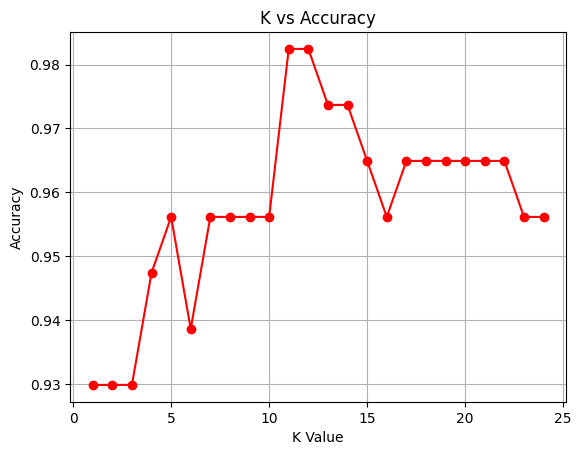

In [3]:
plt.plot(k_values, accuracies, marker='o', linestyle='-', color='r')
plt.xlabel('K Value')
plt.ylabel('Accuracy')
plt.title('K vs Accuracy')
plt.grid(True)
plt.show()